In [49]:
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Polynomial Regression Model

Previously we've looked at linear regression models which are great if your data can be fit to a straight line but often times our data can't be fit to a straight line. In cases like these, we can utilize a polynomial regression to better fit our data.

You might recall from algebra that polynomials are lines that do not follow a straight trajectory. They often curve in various directions. We can take advantage of polynomials with their various bends, curves, etc to fit data sets that are not straight lines.

Let's build a model for predicting fuel efficiency in miles per gallon given engine size, vehicle weight, and horsepower as features for our model. 

Let's start by setting up our training data.

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Hypothetical dataset for vehicle fuel efficiency
engine_sizes = np.array([1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0])  # Engine size in liters
vehicle_weights = np.array([1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000])  # Vehicle weight in kg
horsepowers = np.array([80, 100, 120, 150, 180, 200, 220, 250, 280, 300])  # Horsepower

# Fuel efficiency (MPG)
fuel_efficiencies = np.array([42.5, 38.1, 34.2, 29.8, 26.1, 23.0, 20.2, 18.0, 16.2, 14.6])

# Feature matrix combining engine size, weight, and horsepower
x_train = np.column_stack((engine_sizes, vehicle_weights, horsepowers))
y_train = fuel_efficiencies

As always, let's take a look at our data graphically and also print out the shape of our data to get a better feel for what we're working with.

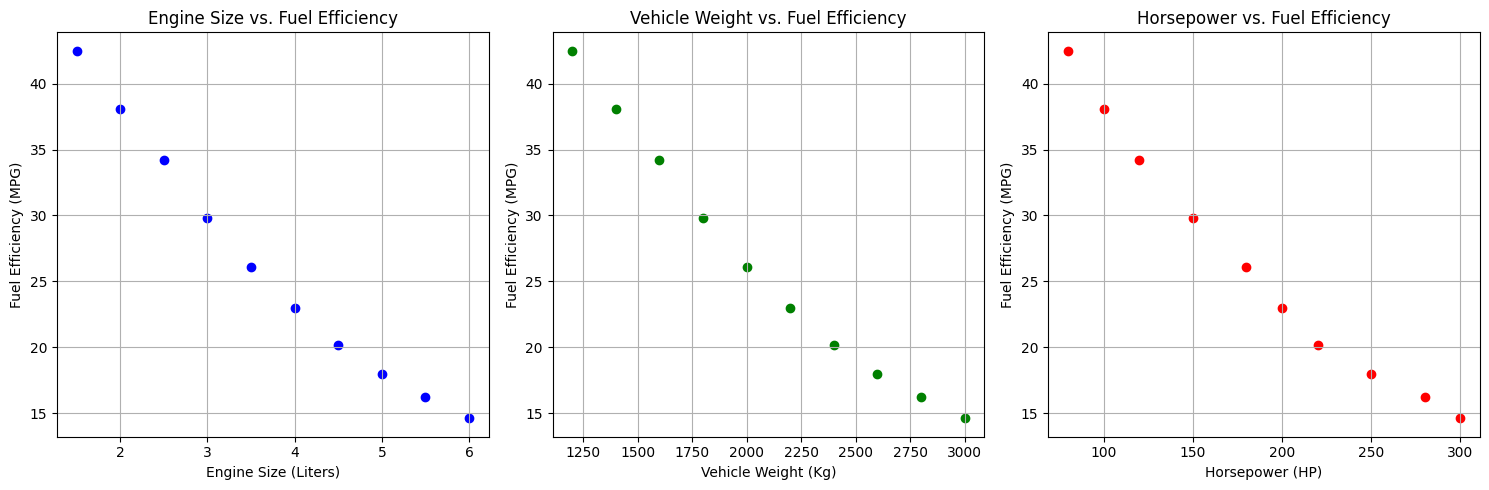

x_train shape: (10, 3)
y_train shape: (10,)


In [51]:
# Plotting individual features vs. fuel efficiency
plt.figure(figsize=(15, 5))

# Engine Size vs. Fuel Efficiency
plt.subplot(1, 3, 1)
plt.scatter(engine_sizes, fuel_efficiencies, color='blue', label='Engine Size')
plt.xlabel('Engine Size (Liters)')
plt.ylabel('Fuel Efficiency (MPG)')
plt.title('Engine Size vs. Fuel Efficiency')
plt.grid(True)

# Vehicle Weight vs. Fuel Efficiency
plt.subplot(1, 3, 2)
plt.scatter(vehicle_weights, fuel_efficiencies, color='green', label='Vehicle Weight')
plt.xlabel('Vehicle Weight (Kg)')
plt.ylabel('Fuel Efficiency (MPG)')
plt.title('Vehicle Weight vs. Fuel Efficiency')
plt.grid(True)

# Horsepower vs. Fuel Efficiency
plt.subplot(1, 3, 3)
plt.scatter(horsepowers, fuel_efficiencies, color='red', label='Horsepower')
plt.xlabel('Horsepower (HP)')
plt.ylabel('Fuel Efficiency (MPG)')
plt.title('Horsepower vs. Fuel Efficiency')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print the shape of x_train and y_train
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")


As we can see, the relationship of each of our features to fuel efficiency is not quite linear. Our data actually would be best fit my some polynomial curve.

Also notice that our training data in x_train is in the shape (10, 3). This means we have matrix consisting of 10 training examples and 3 features (engine size, vehicle weight, horsepower). y_train is a 1D vector with 10 training examples.

# Feature Normalization

We previously learned about feature normailization which is the process of bringing all of the values of your models features into a similar scale with each other. Recall that this is an optimization technique that speeds up the gradient descent algorithm used to minimize our cost function.

## Implementing Normalization
Given our matrix $X$, we want to compute the mean, standard deviation, and finally the normalized version of $X$.

Thankfully, numpy provides some useful methods for computing the mean and standard deviation for $X$ that we will utilize. Under the hood, these methods are performing the following math:



### Computing Mean of $X$

For a feature matrix \( $X$ \) with \( $n$ \) samples and \( $m$ \) features, the mean of the \( $j$ \)-th feature can be computed as follows:

$$
\mu_j = \frac{1}{n} \sum_{i=1}^{n} X_{ij}
$$

where:
- \( $\mu_j$): Mean of the \( j \)-th feature.
- \( $X_{ij}$ \): Value of the \( j \)-th feature for the \( i \)-th sample.



### Computing Standard Deviation of $X$

For a feature matrix \( $X$ \) with \( $n$ \) samples and \( $m$ \) features, the standard deviation of the \( $j$ \)-th feature can be computed as follows:

$$
\sigma_j = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (X_{ij} - \mu_j)^2}
$$

where:
- \( $\sigma_j$ \): Standard deviation of the \( $j$ \)-th feature.
- \( $X_{ij}$ \): Value of the \( $j$ \)-th feature for the \( $i$ \)-th sample.
- \( $\mu_j$ \): Mean of the \( $j$ \)-th feature, as computed previously.


### Normalizing Each Feature

Now that we have computed our mean and standard deviation for each feature in our matrix $X$, we can normalize each feature. Mathematically, this is represented in the following formula:

For a feature matrix ($X$) with ($n$) samples and ($m$) features, each feature can be normalized as follows:

$$
X_{ij}^{\prime} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$

where:
- \( $X_{ij}^{\prime}$ \): Normalized value of the \( j \)-th feature for the \( i \)-th sample.
- \( $\mu_j$ \): Mean of the \( j \)-th feature.
- \( $\sigma_j$ \): Standard deviation of the \( j \)-th feature.

In Python code, we simply need to take the computed mean and subtract it from our matrix $X$ and divide the result by our computed standard deviation.






In [52]:
def normalize_features(X):
    """
    Normalize features to have zero mean and unit variance.
    
    Args:
    X (np.ndarray): Input feature matrix.
    
    Returns:
    np.ndarray: Normalized feature matrix.
    np.ndarray: Mean of each feature.
    np.ndarray: Standard deviation of each feature.
    """
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_norm = (X - mean) / std
    return X_norm, mean, std

Now lets run the function and analyze its results:

In [63]:
# Normalize the original features
x_train_norm, mean, std = normalize_features(x_train)

# Print formatted output
print("Mean of each feature:")
for i, value in enumerate(mean, start=1):
    print(f"Feature {i}: {value:.4f}")

print("\nStandard deviation of each feature:")
for i, value in enumerate(std, start=1):
    print(f"Feature {i}: {value:.4f}")

print("\nOriginal vs Normalized Feature Matrix:")
header = [
    "Feature 1 (Engine Size)",
    "Feature 2 (Vehicle Weight)",
    "Feature 3 (Horsepower)"
]
print(f"{'Original':>9} | {header[0]:>22} | {header[1]:>22} | {header[2]:>22}")
print(f"{'Normalized':>9} | {header[0]:>22} | {header[1]:>22} | {header[2]:>22}")
print("-" * 100)

for original, normalized in zip(x_train, x_train_norm):
    print(
        f"Original   | {original[0]:>22.4f} | {original[1]:>22.4f} | {original[2]:>22.4f}"
        f"\nNormalized | {normalized[0]:>22.4f} | {normalized[1]:>22.4f} | {normalized[2]:>22.4f}\n"
    )

Mean of each feature:
Feature 1: 3.7500
Feature 2: 2100.0000
Feature 3: 188.0000

Standard deviation of each feature:
Feature 1: 1.4361
Feature 2: 574.4563
Feature 3: 71.8053

Original vs Normalized Feature Matrix:
 Original | Feature 1 (Engine Size) | Feature 2 (Vehicle Weight) | Feature 3 (Horsepower)
Normalized | Feature 1 (Engine Size) | Feature 2 (Vehicle Weight) | Feature 3 (Horsepower)
----------------------------------------------------------------------------------------------------
Original   |                 1.5000 |              1200.0000 |                80.0000
Normalized |                -1.5667 |                -1.5667 |                -1.5041

Original   |                 2.0000 |              1400.0000 |               100.0000
Normalized |                -1.2185 |                -1.2185 |                -1.2255

Original   |                 2.5000 |              1600.0000 |               120.0000
Normalized |                -0.8704 |                -0.8704 |         

Notice the difference from our original feature matrix vs the normalized version? It looks like our normalization function worked as expected and has scaled all of our features to be similar to each other which is exactly what we want!

In [53]:
def build_polynomial_features(X, degree):
    """
    Manually create polynomial features up to the specified degree.
    """
    n_samples, n_features = X.shape
    features = [np.ones((n_samples, 1))]  # Start with the bias term (all ones)

    # Create polynomial features
    for d in range(1, degree + 1):
        for combination in np.ndindex((d + 1,) * n_features):
            if sum(combination) == d:
                features.append(np.prod([X[:, i]**comb for i, comb in enumerate(combination)], axis=0).reshape(-1, 1))

    return np.hstack(features)

In [54]:
def gradient_descent(X, y, beta, alpha, iterations):
    """
    Perform gradient descent to minimize the cost function.
    """
    n = len(y)
    cost_history = []

    for _ in range(iterations):
        y_pred = X @ beta
        error = y_pred - y
        gradient = (2 / n) * X.T @ error
        beta -= alpha * gradient

        # Compute mean squared error
        mse = np.mean(error ** 2)
        cost_history.append(mse)

    return beta, cost_history

In [55]:

def evaluate_model(y_true, y_pred):
    """
    Compute mean squared error and R-squared for the predictions.
    """
    mse = np.mean((y_true - y_pred) ** 2)
    r2 = 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)
    return mse, r2

In [56]:
def predict_new_data(new_data, mean, std, beta, degree):
    """
    Predict new data using the learned coefficients and polynomial degree.

    Args:
    new_data (np.ndarray): New data to be predicted.
    mean (np.ndarray): Mean of the original training features.
    std (np.ndarray): Standard deviation of the original training features.
    beta (np.ndarray): Learned coefficients.
    degree (int): Degree of the polynomial features.

    Returns:
    np.ndarray: Predicted values.
    """
    # Normalize new data using training mean and std
    new_data_norm = (new_data - mean) / std

    # Build polynomial features
    X_new = build_polynomial_features(new_data_norm, degree)

    # Predict using learned coefficients
    predictions = X_new @ beta

    return predictions

In [57]:
# Degree of the polynomial
degree = 2

# Build polynomial features using normalized data
X_poly = build_polynomial_features(x_train_norm, degree)

# Initialize coefficients
beta = np.zeros(X_poly.shape[1])

# Learning rate and number of iterations
alpha = 0.01
iterations = 5000

# Apply gradient descent to obtain optimized coefficients
beta, cost_history = gradient_descent(X_poly, y_train, beta, alpha, iterations)

# Predict using the optimized coefficients
y_pred = X_poly @ beta

# Evaluate the model
mse, r2 = evaluate_model(y_train, y_pred)
print(f"Coefficients: {beta}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Coefficients: [ 2.45389420e+01 -3.09590900e+00 -2.97399496e+00 -2.97399496e+00
  9.28728686e-01  4.24254128e-01 -1.50469525e-02  4.24254128e-01
 -1.50469525e-02 -1.50469525e-02]
Mean Squared Error: 0.01
R-squared: 1.00


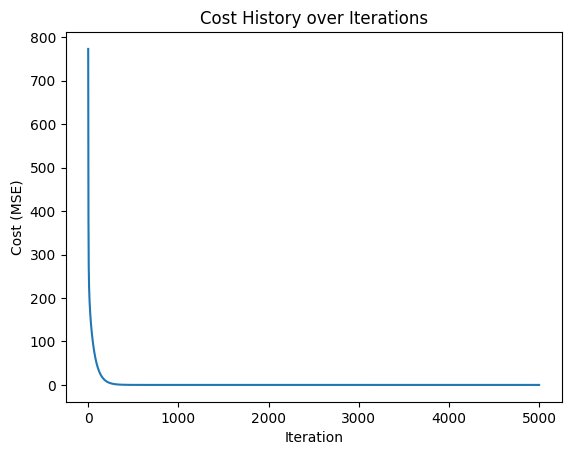

In [58]:
# Plot cost history
plt.figure()
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.title('Cost History over Iterations')
plt.show()

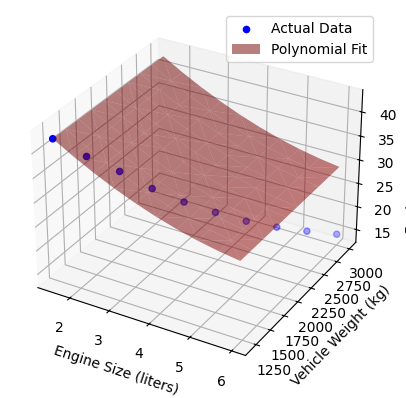

In [59]:
# Visualize predictions vs. actual data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(engine_sizes, vehicle_weights, fuel_efficiencies, color='blue', label='Actual Data')
ax.set_xlabel('Engine Size (liters)')
ax.set_ylabel('Vehicle Weight (kg)')
ax.set_zlabel('Fuel Efficiency (MPG)')

# Generate grid for surface plot
engine_grid, weight_grid = np.meshgrid(np.linspace(engine_sizes.min(), engine_sizes.max(), 10),
                                       np.linspace(vehicle_weights.min(), vehicle_weights.max(), 10))
hp_grid = np.linspace(horsepowers.min(), horsepowers.max(), 10)
grid_combinations = np.array([[es, vw, hp] for es in engine_grid.ravel() for vw in weight_grid.ravel() for hp in hp_grid])

# Normalize the grid data with the same mean and std as the training data
grid_combinations_norm = (grid_combinations - mean) / std
X_grid = build_polynomial_features(grid_combinations_norm, degree)
y_grid_pred = X_grid @ beta

# Surface plot
ax.plot_trisurf(engine_grid.ravel(), weight_grid.ravel(), y_grid_pred, color='red', alpha=0.5, label='Polynomial Fit')

plt.legend()
plt.show()

In [60]:
# Predict new data
new_data = np.array([[4.0, 2200, 180],  # Example 1: Engine size 4.0L, weight 2200kg, horsepower 180
                     [2.5, 1800, 120],  # Example 2: Engine size 2.5L, weight 1800kg, horsepower 120
                     [5.7, 2900, 255]]) 
predictions = predict_new_data(new_data, mean, std, beta, degree)

print("Predicted fuel efficiencies for new data:")
for i, pred in enumerate(predictions):
    print(f"Example {i + 1}: {pred:.2f} MPG")

Predicted fuel efficiencies for new data:
Example 1: 23.84 MPG
Example 2: 32.98 MPG
Example 3: 15.28 MPG
